In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
class HousingLoan:
    def __init__(self, principal, annual_interest_rate, loan_term_years):
        self.principal = principal
        self.annual_interest_rate = annual_interest_rate
        self.loan_term_years = loan_term_years
        self.monthly_interest_rate = annual_interest_rate / 12 / 100
        self.total_payments = loan_term_years * 12
        self.emi = self.calculate_emi()

    def calculate_emi(self):
        emi = (self.principal * self.monthly_interest_rate * math.pow(1 + self.monthly_interest_rate, self.total_payments)) / (math.pow(1 + self.monthly_interest_rate, self.total_payments) - 1)
        return emi

    def generate_amortization_schedule(self):
        balance = self.principal
        schedule = []
        for month in range(1, self.total_payments + 1):
            interest = balance * self.monthly_interest_rate
            principal = self.emi - interest
            balance -= principal
            schedule.append((month, self.emi, principal, interest, balance))
        return schedule

    def plot_emi_chart(self):
        schedule = self.generate_amortization_schedule()
        months = [entry[0] for entry in schedule]
        balances = [entry[4] for entry in schedule]

        plt.figure(figsize=(10, 6))
        plt.plot(months, balances)
        plt.title('Loan Balance Over Time')
        plt.xlabel('Month')
        plt.ylabel('Balance')
        plt.grid(True)
        plt.show()

    def calculate_early_closure(self, closure_month):
        schedule = self.generate_amortization_schedule()
        total_interest_paid = sum(entry[3] for entry in schedule[:closure_month])
        total_interest_expected = sum(entry[3] for entry in schedule)
        interest_lost = total_interest_expected - total_interest_paid
        remaining_months = self.total_payments - closure_month
        monthly_interest_lost = interest_lost / remaining_months if remaining_months > 0 else 0
        return interest_lost, monthly_interest_lost


In [3]:
loan = HousingLoan(principal=200000, annual_interest_rate=7.5, loan_term_years=20)
print(f"Monthly EMI: ${loan.emi:.2f}")

Monthly EMI: $1611.19


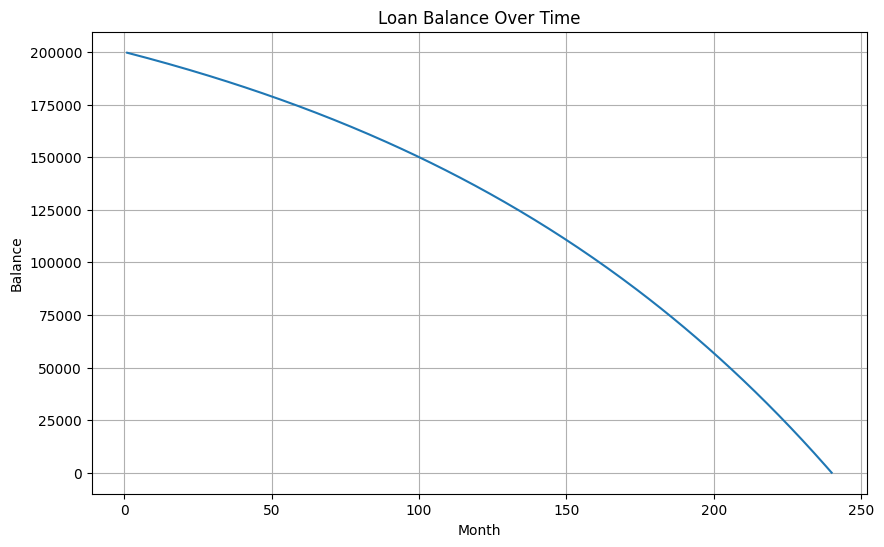

In [4]:
loan.plot_emi_chart()

In [5]:
early_closure_month = 120  # Closing after 10 years
interest_lost, monthly_interest_lost = loan.calculate_early_closure(early_closure_month)
print(f"Interest lost on early closure: ${interest_lost:.2f}")
print(f"Monthly interest lost distribution: ${monthly_interest_lost:.2f}")

Interest lost on early closure: $57608.38
Monthly interest lost distribution: $480.07
